<a href="https://colab.research.google.com/github/NizarMohd/RunOrWalk/blob/main/3-ClassMLPWeek8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/nirajvermafcb/principal-component-analysis-with-scikit-learn


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df=pd.read_csv('features_test1.csv') #Replace it with your path where the data file is stored
df.head()
df.describe()



,min ax,min ay,min az,min gx,min gy,min gz,max ax,max ay,max az,max gx,max gy,max gz,mean ax,mean ay,mean az,mean gx,mean gy,mean gz,label
count,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,-114.584766,12.375391,-102.925781,-4.432422,-114.128516,-108.735938,76.567969,114.271094,111.463281,-4.233203,112.292969,100.948437,-26.869531,58.970703,19.780469,-4.233203,-5.843359,-2.425781,1.256641
std,33.081008,36.954828,54.484417,0.904228,31.066963,32.995503,49.317246,33.719911,26.529703,0.880464,33.741126,36.610959,21.028093,27.651694,29.007314,0.880464,12.293026,8.718289,0.696776
min,-127.000000,-127.000000,-127.000000,-6.000000,-127.000000,-127.000000,-43.000000,-47.000000,-15.000000,-6.000000,-23.000000,-1.000000,-101.000000,-61.000000,-60.000000,-6.000000,-49.000000,-42.000000,0.000000
25%,-127.000000,-5.000000,-127.000000,-5.000000,-127.000000,-127.000000,31.000000,127.000000,101.000000,-5.000000,127.000000,78.000000,-42.000000,47.000000,0.000000,-5.000000,-15.000000,-8.000000,1.000000
50%,-127.000000,21.000000,-127.000000,-5.000000,-127.000000,-127.000000,84.000000,127.000000,127.000000,-4.000000,127.000000,127.000000,-31.000000,64.000000,19.000000,-4.000000,-5.000000,-2.000000,1.000000
75%,-127.000000,42.000000,-127.000000,-4.000000,-127.000000,-103.000000,127.000000,127.000000,127.000000,-4.000000,127.000000,127.000000,-14.000000,83.000000,45.000000,-4.000000,1.000000,2.000000,2.000000
max,28.000000,61.000000,66.000000,-1.000000,-2.000000,2.000000,127.000000,127.000000,127.000000,-1.000000,127.000000,127.000000,59.000000,99.000000,73.000000,-1.000000,46.000000,42.000000,2.000000


Text(0.5, 1.0, 'Correlation between different features')

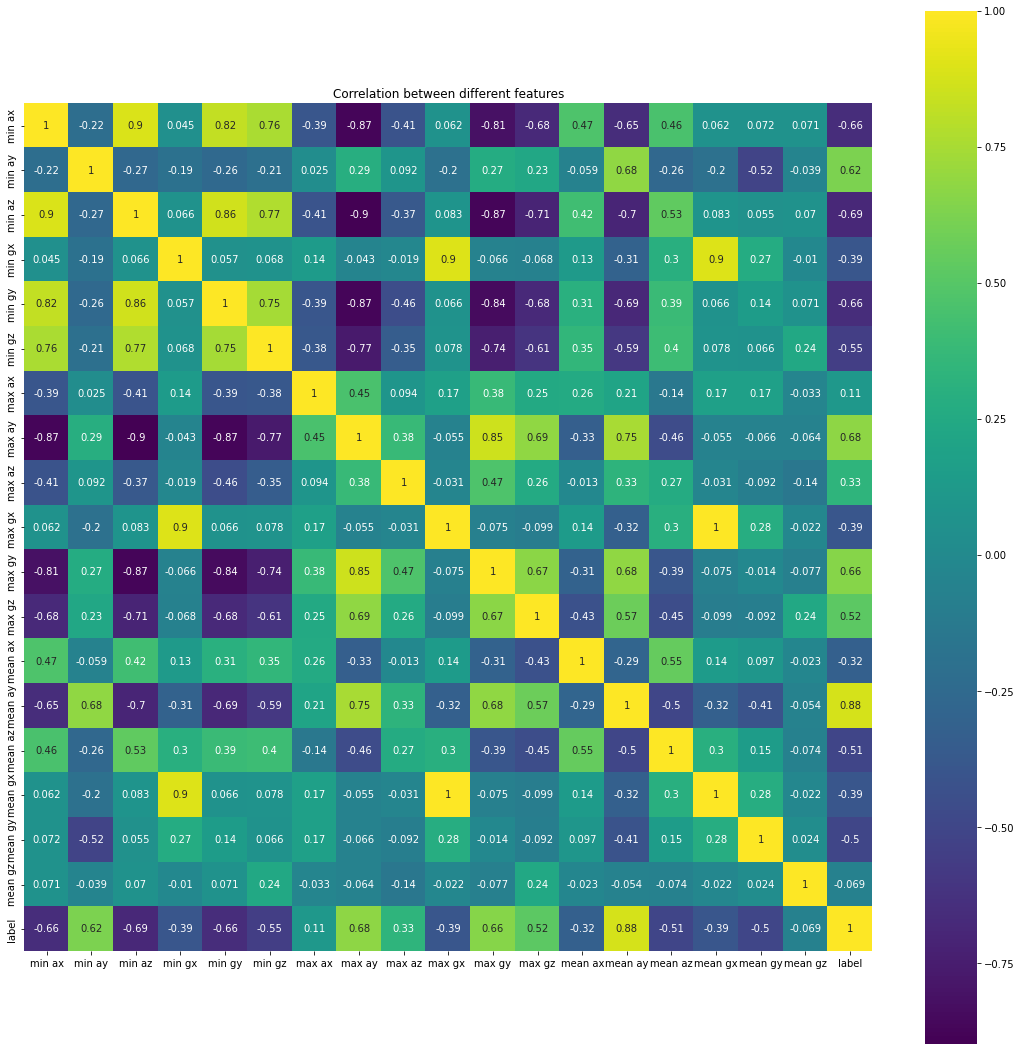

In [2]:
correlation = df.corr()
plt.figure(figsize=(19,19))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different features')

### **1. Preparation**



**Check Python version.**

In [3]:
!python -V

Python 3.7.12


**Check Cuda version.**

In [4]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


**Install dependencies.**

In [5]:
pip install torch torchvision

In [6]:
pip install opencv-python

**Check GPU usage.**

In [7]:
# Check if runtime uses GPU
import torch

gpu_name = torch.cuda.get_device_name(0)

print("Using GPU", gpu_name)

Using GPU Tesla P100-PCIE-16GB


Load Dataset

In [8]:

# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.utils.data import Dataset
from torch.utils.data import Sampler
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Dropout
from torch.optim import Adam, SGD
import tensorflow as tf
from torchvision import transforms
from torchvision.transforms import *
from sklearn.utils import shuffle

datasets = pd.read_csv('features_test1.csv')
datasets.dropna()
datasets = shuffle(datasets)


train_set, test_set = train_test_split(datasets, test_size = 0.1)
train_set = train_set.dropna()

print(len(train_set))


test_set, val_set = train_test_split(test_set, test_size = 0.5)
test_set.dropna()
val_set.dropna()

k_fold = 10
seg = round(1/k_fold * len(train_set))
class MyDataset(Dataset):
  
    def __init__(self, type):

      # # compute k_fold segments
      # val_l = int(seg * k)
      # val_r = int(val_l + seg)

      # val_set = train_set.iloc[val_l:val_r]
      # training_set = train_set.drop(val_set.index)
      if type == "train":
        self.data = train_set
      elif type == "test":
        self.data = test_set
      elif type == "val":
        self.data = val_set
      print(f'loaded data with dataset size {len(self)}')
      # print("Val left index: " + str(val_l))
      # print("Val right index: " + str(val_r))
 
      
    def __getitem__(self, idx):
        classes = 3
        # print(self.data.iloc[idx])
        # sys.stdout.flush()
        item = self.data.iloc[idx] 
        image = item[0:18]
        label = item[18]
        image = torch.from_numpy(np.array(image))
        labels = []
        for i in range(classes):
            if i == label:
              labels.append(1)
            else:
              labels.append(0)
        labels = torch.IntTensor(labels)
        return image, labels

    def __len__(self):
        return len(self.data)


2304


**MLP** Model

In [11]:
import torch.nn as nn
import torch.nn.functional as F
class Model(nn.Module):
  
  def __init__(self):
    super(Model, self).__init__()
    n_input = 18
    n_h1 = 512
    n_h2 = 256
    n_h3 = 64
    n_output = 3

    self.h1 = nn.Linear(n_input, n_h1)
    self.h2 = nn.Linear(n_h1, n_h2)
    self.h3 = nn.Linear(n_h2, n_h3)
    self.output = nn.Linear(n_h3, n_output)

    print(self)
  
  def forward(self, x):
    x = F.relu(self.h1(x))
    x = F.relu(self.h2(x))
    x = F.relu(self.h3(x))
    x = self.output(x)
    return x


# class Net(nn.Module):   
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(24,12)    # input layer
#         self.fc2 = nn.Linear(12, 6)            # hidden layer
#         self.out = nn.Linear(6, 2)
        

#     # Defining the forward pass    
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.out(x)
#         return x


Train Model

In [13]:
from torch import optim
from sklearn.model_selection import StratifiedKFold
confusion_matrix = [[0,0,0],[0,0,0], [0,0,0]]
def accuracy_score(outputs, targets):
  sum = 0
  batch_size = targets.size(0)
  global confusion_matrix
  for i in range(batch_size):
    index_O = outputs.cpu().data.numpy()[i].argmax()
    index_T = targets.cpu().data.numpy()[i].argmax()
    confusion_matrix[index_O][index_T] = confusion_matrix[index_O][index_T]  + 1

    if index_O == index_T:
      sum = sum + 1
  return sum / batch_size

def train():
  batch_size = 64
  num_epochs = 300
  num_workers = 2

  model = Model()
  model = model.cuda().float()
  
  loss_fn = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(),lr = 0.00001, momentum= 0.9, nesterov = True)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1, factor=0.3, verbose=True)

  global confusion_matrix
  
  train_set = MyDataset("train")
  validation_set = MyDataset("val")

  train_loader = torch.utils.data.DataLoader(
        train_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=True)
  validation_loader = torch.utils.data.DataLoader(
        validation_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=False)

  for epoch in range(num_epochs):
    train_loss, valid_loss = [], []
    train_acc , val_acc = [], []
    # train
    model.train()

    # #quantize model
    # model.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
    # model = torch.quantization.prepare_qat(model, inplace=True)

    for i, (data, target) in enumerate(train_loader):
        data, target = data.cuda().float(), target.cuda().float()
        # clear gradients
        optimizer.zero_grad()

        # forward prop
        prediction = model(data)

        # loss calculation
        loss = loss_fn(prediction, target)

        #backward prop
        loss.backward()

        ## weight optimization
        optimizer.step()

        train_loss.append(loss.item())
        train_acc.append(accuracy_score(prediction, target))

        if i % 100 == 99:
                print(f'training: iteration {i} / {len(train_loader)}, avg train loss = {np.mean(train_loss):.4f}, '
                      f'train accuracy {np.mean(train_acc):.4f}')
    
    # eval
    model.eval()
    for i, (data, target) in enumerate(validation_loader):
        data, target = data.cuda().float(), target.cuda().float()
        prediction = model(data)
        loss = loss_fn(prediction, target)
        valid_loss.append(loss.item())
        val_acc.append(accuracy_score(prediction, target))

        if i % 100 == 99:
                print(f'validation: iteration {i} / {len(validation_loader)}, avg val loss = {np.mean(train_loss):.4f}, '
                      f'val accuracy {val_acc.avg:.4f}')

    # epoch summary
    print("Epoch:", epoch, "Train Loss:", np.mean(train_loss), "Train acc:", np.mean(train_acc), "Val Loss:", np.mean(valid_loss), "Val Acc:",  np.mean(val_acc))
    print(confusion_matrix)
    confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]]
    # lr scheduler
    scheduler.step(np.mean(valid_loss))

    # checkpoint
    if epoch % 2 == 10:
        torch.save(model.state_dict(), f'ckpt_e{epoch}.pth')
    
  torch.save(model.state_dict(), 'A0183398M-Model.pth')



  

if __name__ == "__main__":
    train()


Model(
  (h1): Linear(in_features=18, out_features=512, bias=True)
  (h2): Linear(in_features=512, out_features=256, bias=True)
  (h3): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=3, bias=True)
)
loaded data with dataset size 2304
loaded data with dataset size 128
Epoch: 0 Train Loss: 0.7315921477145619 Train acc: 0.5230034722222222 Val Loss: 0.2300504371523857 Val Acc: 0.703125
[[126, 112, 73], [107, 659, 400], [130, 315, 510]]
Epoch: 1 Train Loss: 0.2085764759944545 Train acc: 0.7335069444444444 Val Loss: 0.16744417697191238 Val Acc: 0.78125
[[182, 26, 7], [108, 828, 196], [73, 232, 780]]
Epoch: 2 Train Loss: 0.164163369892372 Train acc: 0.8168402777777778 Val Loss: 0.1364070028066635 Val Acc: 0.859375
[[229, 19, 7], [85, 906, 119], [49, 161, 857]]
Epoch: 3 Train Loss: 0.13999700877401564 Train acc: 0.8585069444444444 Val Loss: 0.12153121083974838 Val Acc: 0.8984375
[[261, 14, 7], [62, 957, 101], [40, 115, 875]]
Epoch: 4 Train L

Test Accuracy

In [14]:
from torch.nn.modules.container import ModuleList
import torch
from torch import nn
# Change [your_python_file] to the actual file containing the definitons of the classes


def test():
    my_model = Model()
    my_model = my_model.cuda()
    my_model.eval()

    my_model.load_state_dict(torch.load('A0183398M-Model.pth'))
    
    
    test_set = MyDataset("test")
    batch_size = 64


    # mp.set_start_method('spawn', force=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, \
                      shuffle=False)

    # test accuracy
    test_acc = []
    for i, (image,label) in enumerate(test_loader):
        image, label = image.cuda().float(), label.cuda().float()
        with torch.no_grad():
            prediction = my_model(image)
            acc = accuracy_score(prediction, label)
            test_acc.append(acc)

        if i % 10 == 9:
            print(f'test: iteration {i} / {len(test_loader)}, '
                  f'test accuracy {np.mean(test_acc):.4f}')

    print(f'evaluation finished, val acc {np.mean(test_acc):.4f}')

if __name__ == "__main__":
    test()

Model(
  (h1): Linear(in_features=18, out_features=512, bias=True)
  (h2): Linear(in_features=512, out_features=256, bias=True)
  (h3): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=3, bias=True)
)
loaded data with dataset size 128
evaluation finished, val acc 0.9688


Dataset Preparation for quantized model

In [20]:

# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.utils.data import Dataset
from torch.utils.data import Sampler
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Dropout
from torch.optim import Adam, SGD
import tensorflow as tf
from torchvision import transforms
from torchvision.transforms import *
from sklearn.utils import shuffle

datasets = pd.read_csv('features_test1.csv')
datasets.dropna()
datasets = shuffle(datasets)

print(len(train_set))

class MyDataset_Q(Dataset):
  
    def __init__(self):
        self.data = datasets
    
      
    def __getitem__(self, idx):
        classes = 3
        # print(self.data.iloc[idx])
        # sys.stdout.flush()
        item = self.data.iloc[idx] 
        image = item[0:18]
        label = item[18]
        image = torch.from_numpy(np.array(image))
        labels = []
        for i in range(classes):
            if i == label:
              labels.append(1)
            else:
              labels.append(0)
        labels = torch.IntTensor(labels)
        return image, labels

    def __len__(self):
        return len(self.data)

2304


Extract weights and biases

In [26]:
from torch import nn
import torch
import torch.quantization.quantize_fx as quantize_fx
import copy
import csv

my_model = Model()
my_model = my_model.cuda()
my_model.eval()
my_model.load_state_dict(torch.load('A0183398M-Model.pth'))


w1 = []
w2 = []
w3 = []
w4 = []

b1 = []
b2 = []
b3 = []
b4 = []

n_input = 18
n_h1 = 512
n_h2 = 256
n_h3 = 64
n_output = 3

for param_tensor in my_model.state_dict():
    # get each layer, print layer size
    print(param_tensor, "\t", my_model.state_dict()[param_tensor].size())
    print("\n")
    print(param_tensor, "\t", my_model.state_dict()[param_tensor])
    print("\n")

    # prepare min,max of each layer
    r_max = 0
    r_min = 0
    layer = my_model.state_dict()[param_tensor]

  
    out = []

    
    r = 0
  

    if param_tensor == 'h1.weight' or param_tensor == 'h2.weight'  or param_tensor == 'h3.weight' or param_tensor == 'output.weight':
      #layer is 2D array
      for row in layer:
        r = r + 1
        for item in row:
          y = item.item() * (10**3)
          out.append(round(y))
          if param_tensor == 'h1.weight':
            w1.append(round(y))
          elif param_tensor == 'h2.weight':
            w2.append(round(y))
          elif param_tensor == 'h3.weight':
            w3.append(round(y))
          else:
            w4.append(round(y))
          

      
    else:
      # layer is 1D array
      for item in layer:
          r = r + 1
          y = item.item() * (10**3)
          
          out.append(round(y))
          if param_tensor == 'h1.bias':
            b1.append(round(y))
          elif param_tensor == 'h2.bias':
            b2.append(round(y))
          elif param_tensor == 'h3.bias':
            b3.append(round(y))
          else:
            b4.append(round(y))

    print(r)
    print(out)
    
    print("\n")


#  compute accuracy of quantized weights


test_set = MyDataset_Q()
batch_size = 64


# mp.set_start_method('spawn', force=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, \
                  shuffle=False)

# test accuracy
test_acc = []

confusion_matrix = [[0,0,0], [0,0,0], [0,0,0]]
for k, (image,label) in enumerate(test_loader):
        
        acc = 0
        idx = 0
        preds = []
        for data in image:
          z1 = []
          z2 = []
          z3 = []
          z4 = []
          # 24 attr, 64 data
          # compute Z1 = W1x + b1
          j = 0
          z = 0
          x = data.numpy()
          for i in range(0, n_h1 * n_input):
            z = w1[i] * x[i%n_input] + z
            if i% n_input == n_input - 1:
              z = z + b1[j]
              j = j + 1
              if z < 0:
                z = 0
              z1. append(round(z)/1000)
              z = 0
          

          # compute z2 = w2 * z1 + b2
          j = 0
          z = 0
          for i in range(0, n_h2 * n_h1):
            z = w2[i] * z1[i%n_h1] + z
            if z > 2 ** 31 or z < -2**31:
                print("flag")
            if i% n_h1 == n_h1 - 1:
              z = z + b2[j]
              j = j + 1
              if z < 0:
                z = 0
              z2.append(round(z)//1000)
              
              z = 0 
          
          j = 0
          z = 0
          for i in range(0, n_h3 * n_h2):
            z = w3[i] * z2[i%n_h2] + z
            if z > 2 ** 31 or z < -2**31:
              print("flag")
            if i% n_h2 == n_h2 - 1:
              z = z + b3[j]
              j = j + 1
              if z < 0:
                z = 0
              z3.append(round(z)//1000)
              z = 0 

          j = 0
          z = 0
          for i in range(0, n_output * n_h3):
            z = w4[i] * z3[i%n_h3] + z
            if z > 2 ** 31 or z < -2**31:
                print("flag")
            if i% n_h3 == n_h3-1:
              z = z + b4[j]
              j = j + 1
              if z < 0:
                z = 0
              z4.append(round(z))
              z = 0 
          
        
          pred = np.argmax(np.asarray(z4))
          preds.append(pred)



        sum = 0
        for i in range(label.size(0)):
          i_o = preds[i]
          i_t = np.argmax(label[i].numpy())
          confusion_matrix[i_o][i_t] = confusion_matrix[i_o][i_t] + 1
          if i_o == i_t:
            sum = sum + 1
        test_acc.append(sum/label.size(0))
        print(sum/label.size(0))
        print(confusion_matrix)
        

print(np.mean(test_acc))  
  

Model(
  (h1): Linear(in_features=18, out_features=512, bias=True)
  (h2): Linear(in_features=512, out_features=256, bias=True)
  (h3): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=3, bias=True)
)
h1.weight 	 torch.Size([512, 18])


h1.weight 	 tensor([[-0.0226, -0.0235, -0.0135,  ...,  0.0675, -0.0690, -0.0967],
        [-0.0490, -0.0738,  0.2042,  ..., -0.2075,  0.1243, -0.0474],
        [-0.1044,  0.0691, -0.1491,  ...,  0.0097, -0.0684,  0.0908],
        ...,
        [ 0.0870, -0.1463,  0.1581,  ...,  0.0412,  0.0383, -0.0177],
        [-0.2118, -0.1351, -0.1801,  ...,  0.0175,  0.1473,  0.0789],
        [-0.0868,  0.1096,  0.0505,  ...,  0.1607,  0.2349, -0.2259]],
       device='cuda:0')


512
[-23, -24, -14, -54, 108, 219, -155, 111, -165, -170, -72, 14, 9, 127, 183, 68, -69, -97, -49, -74, 204, 114, 67, 230, 186, -224, -130, 142, -47, 50, 38, 230, 126, -208, 124, -47, -104, 69, -149, -131, 198, -106, -25, 45, 234, 81, -203,

In [ ]:
"Real Time Testing"

In [18]:


class MyTestSet(Dataset):
    
    
    def __init__(self, in_data):
  
      self.data = in_data
      print(f'loaded data with dataset size {len(self)}')
 
      
    def __getitem__(self, idx):
        classes = 3
        # print(self.data.iloc[idx])
        # sys.stdout.flush()
        item = self.data.iloc[idx] 
        image = item[2:20]
        label = item[20]
        time = item[1]
        batch = item[0]
        image = torch.from_numpy(np.array(image))
        labels = []
        for i in range(classes):
            if i == label:
              labels.append(1)
            else:
              labels.append(0)
        labels = torch.IntTensor(labels)
        return image, labels, time, batch

    def __len__(self):
        return len(self.data)

pseudo_real_time_test = datasets = pd.read_csv('time_test.csv')
pseudo_real_time_test.dropna()

prtt = MyTestSet(pseudo_real_time_test)

test_loader = torch.utils.data.DataLoader(prtt, batch_size=1, shuffle=False)

for k, (image,label, time, batch) in enumerate(test_loader):
        
        acc = 0
        idx = 0
        preds = []
        for data in image:
          z1 = []
          z2 = []
          z3 = []
          z4 = []
          # 24 attr, 64 data
          # compute Z1 = W1x + b1
          j = 0
          z = 0
          x = data.numpy()
          for i in range(0, n_h1 * n_input):
            z = w1[i] * x[i%n_input] + z
            if i% n_input == n_input - 1:
              z = z + b1[j]
              j = j + 1
              if z < 0:
                z = 0
              z1. append(round(z)//1000)
              z = 0
          

          # compute z2 = w2 * z1 + b2
          j = 0
          z = 0
          for i in range(0, n_h2 * n_h1):
            z = w2[i] * z1[i%n_h1] + z
            if i% n_h1 == n_h1 - 1:
              z = z + b2[j]
              j = j + 1
              if z < 0:
                z = 0
              z2.append(round(z)//1000)
              z = 0 
          
          j = 0
          z = 0
          for i in range(0, n_h3 * n_h2):
            z = w3[i] * z2[i%n_h2] + z
            if i% n_h2 == n_h2 - 1:
              z = z + b3[j]
              j = j + 1
              if z < 0:
                z = 0
              z3.append(round(z)//1000)
              z = 0 

          j = 0
          z = 0
          for i in range(0, n_output * n_h3):
            z = w4[i] * z3[i%n_h3] + z
            if i% n_h3 == n_h3-1:
              z = z + b4[j]
              j = j + 1
              if z < 0:
                z = 0
              z4.append(round(z))
              z = 0 
          
        
          pred = np.argmax(np.asarray(z4))
          actual = np.argmax(label.numpy())

          if pred == actual:
            print("Correct prediction at: " + str(time.item()/2000.0) + ", " + str(time.item()) + " for batch" + str(batch.item()))
    

          
      


loaded data with dataset size 435
Correct prediction at: 0.3935, 787 for batch1
Correct prediction at: 0.463, 926 for batch1
Correct prediction at: 0.5325, 1065 for batch1
Correct prediction at: 0.602, 1204 for batch1
Correct prediction at: 0.672, 1344 for batch1
Correct prediction at: 0.7415, 1483 for batch1
Correct prediction at: 0.811, 1622 for batch1
Correct prediction at: 0.8815, 1763 for batch1
Correct prediction at: 0.951, 1902 for batch1
Correct prediction at: 1.0205, 2041 for batch1
Correct prediction at: 0.3935, 787 for batch2
Correct prediction at: 0.463, 926 for batch2
Correct prediction at: 0.5325, 1065 for batch2
Correct prediction at: 0.6025, 1205 for batch2
Correct prediction at: 0.6725, 1345 for batch2
Correct prediction at: 0.742, 1484 for batch2
Correct prediction at: 0.8115, 1623 for batch2
Correct prediction at: 0.881, 1762 for batch2
Correct prediction at: 0.951, 1902 for batch2
Correct prediction at: 1.0205, 2041 for batch2
Correct prediction at: 0.4635, 927 for 